# Feature Scaling
Feature scaling, sometimes referred to as normalisation, is the process of transforming data to a common scale. It is an important preprocessing step, and many methods of analysis, will perform poorly if the data's features have not been correctly scaled.  

This notebook exhibits the following methods of feature scaling by plotting their effect on data sampled from a uniform distribution:
- Standardization (Z-score normalization)
- Rescaling (min-max normalization) 
- Max abs scaling
- Unit length scaling
- Robust Scaling

In [115]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler, Normalizer, RobustScaler

In [123]:
# Create Original Unscaled Data: 
n_data_points = 20
range_min = 0 
range_max = 4
data = np.random.uniform(range_min, range_max, size=(n_data_points, 1))

## Standardization (Z-Score Normalisation)
Standardization is the most popular method of feature scaling. It is widely used before applying machine learning algorithms, and is a crucial step before principle component analysis (see [https://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html)). The process involves transforming each feature of the data such that it has zero mean and unit variance. This is achieved by first calculating the mean and standard deviation, then subtracting the mean from the data point, and finally dividing by the standard deviation. Mathematically,

$x^{\prime} = \dfrac{x - \bar{x}}{\sigma}$,

where $x^{\prime}$ is the scaled value, $x$ is the original value, $\bar{x}$ is the mean, and $\sigma$ is the standard deviation. Below, scikit-learn's `StandardScaler` is used.

Variance of Standardized data is: 1.0
Mean of Standardized data is: -0.000000


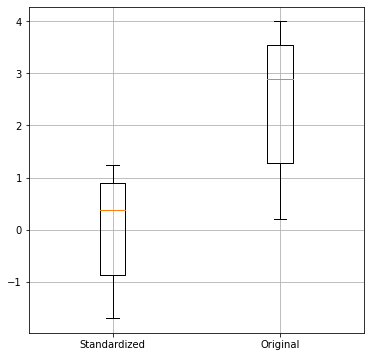

In [124]:
# Standardize Data:
standard_scaled_data = StandardScaler().fit_transform(np.copy(data))

# Verify Variance and Mean:
print(f"Variance of Standardized data is: {np.var(standard_scaled_data)}")
print(f"Mean of Standardized data is: {np.mean(standard_scaled_data):.6f}")

# Plot:
plt.figure(figsize=(6,6))
plt.boxplot([standard_scaled_data.reshape(-1), data.reshape(-1)])
plt.xticks([1, 2], ['Standardized', 'Original'])
plt.grid()
plt.show()

## Rescaling (Min-Max Normalisation)
Rescaling, also known as min-max normalisation, is probably the simplest method of feature scaling. It transforms each feature of the data such that its range becomes $[0,1]$ (sometimes the range $[-1,1]$ is used instead). This is achieved using the formula,

$x^{\prime} = \dfrac{x - \min(x)}{\max(x) - \min(x)}$,

for scaled value $x^{\prime}$, and original value $x$. Since only the $\min$ and $\max$ of the data is used, this process is determined by outlier values. For example, if there is an abnormal positively valued outlier then the rescaled data will be disproportionately skewed in the positive direction. However, if one simply wants to compare the relative changes of some data at the same scale, then min-max normalisation is appropriate. Below, scikit-learn's `MinMaxScaler` is used.

Minimum value of rescaled data is: 0.0
Maximum value of rescaled data is: 1.0


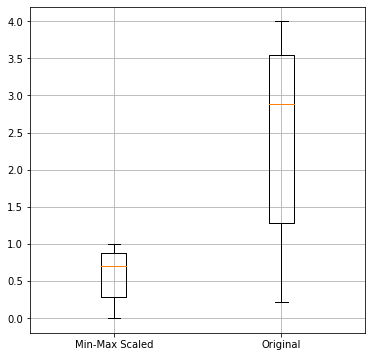

In [125]:
# Scale Data:
min_max_scaled_data = MinMaxScaler().fit_transform(np.copy(data))

# Verify Min and Max:
print(f"Minimum value of rescaled data is: {np.min(min_max_scaled_data)}")
print(f"Maximum value of rescaled data is: {np.max(min_max_scaled_data)}")

# Plot:
plt.figure(figsize=(6,6))
plt.boxplot([min_max_scaled_data.reshape(-1), data.reshape(-1)])
plt.xticks([1, 2], ['Min-Max Scaled', 'Original'])
plt.grid()
plt.show()

## Max Abs Scaling
Max abs scaling, short for maximum absolute value scaling, transforms the data such that the maximum absolute value found for any feature is 1.0. Put mathematically,

$x^{\prime} = \dfrac{x}{\max(|x|)}$,

for original value $x$ and scaled value $x^{\prime}$. While this method is influenced by outliers it does not shift the data, and so preserves any sparsity in the data. As such, max abs scaling can be appropriate for sparse datasets. Below, scikit-learns' `MaxAbsScaler` is used.

Maximum value of rescaled data is: 1.0


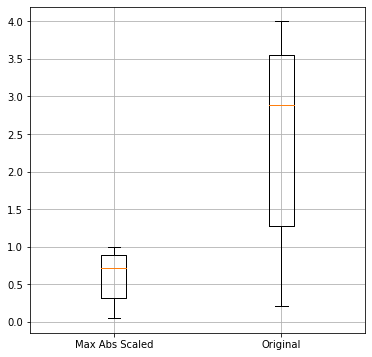

In [126]:
# Scale Data:
max_abs_scaled_data = MaxAbsScaler().fit_transform(np.copy(data))

# Verify :
print(f"Maximum value of rescaled data is: {np.max(max_abs_scaled_data)}")

# Plot:
plt.figure(figsize=(6,6))
plt.boxplot([max_abs_scaled_data.reshape(-1), data.reshape(-1)])
plt.xticks([1, 2], ['Max Abs Scaled', 'Original'])
plt.grid()
plt.show()

## Unit Length Scaling
This method of scaling transforms the data by scaling each value by the norm (the length of a vector). As such,

$x^{\prime} = \dfrac{x}{||x||}$,

where $x$ is the original value, $x^\prime$ is the scaled value, and $||x||$ is the norm. By default, the L2 norm is selected but the keyword argument `norm` allows another norm, such as L1, to be specified. Below, scikit-learn's `Normalizer` is used, where the scaler acts on the rows of a 2D array (so reshaping is required).

Sum of all squared values in rescaled data is: 1.0000


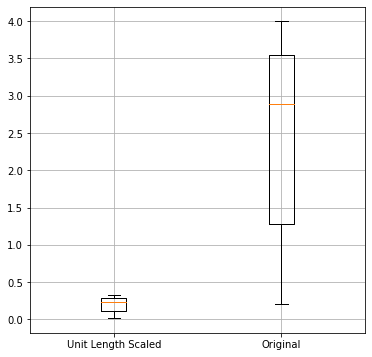

In [127]:
# Scale Data:
unit_length_scaled_data = Normalizer().fit_transform(np.copy(data).reshape(1, n_data_points))

# Verify :
print(f"Sum of all squared values in rescaled data is: {np.sum(np.power(unit_length_scaled_data,2)):.4f}")

# Plot:
plt.figure(figsize=(6,6))
plt.boxplot([unit_length_scaled_data.reshape(-1), data.reshape(-1)])
plt.xticks([1, 2], ['Unit Length Scaled', 'Original'])
plt.grid()
plt.show()

## Robust Scaling
Robust scaling is a method that aims to be robust against outlier values. It works by shifting the data by the median and scaling according to a specified quantile range (by default this is the range between the 25th and 75th quantiles). Mathematically, 

$x^{\prime} = \dfrac{x - \text{median}(x)}{x_{75} - x_{25}}$,

were $x^{\prime}$ is the scaled value, $x$ is the original value, $\text{median}(x)$ is the median value, and $x_{25}$ and $x_{75}$ are the 25th and 75th quantiles respectively. By using the median and a quantile range that covers the bulk of the data, any outlier values do not factor into the transform of the data. Below, scikit-learn's `RobustScaler` is used. Since this function operates on the columns of a 2D array (so data may require reshaping).

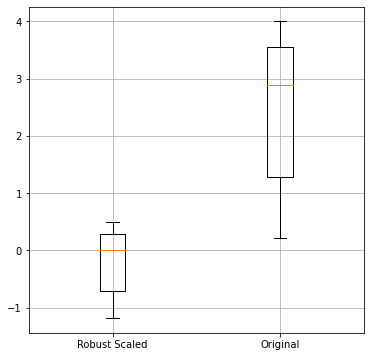

In [128]:
# Scale Data:
robust_scaled_data = RobustScaler().fit_transform(np.copy(data).reshape(n_data_points, 1))

# Plot:
plt.figure(figsize=(6,6))
plt.boxplot([robust_scaled_data.reshape(-1), data.reshape(-1)])
plt.xticks([1, 2], ['Robust Scaled', 'Original'])
plt.grid()
plt.show()

## Comparison
Finally, a comparison of all the methods above is shown. 

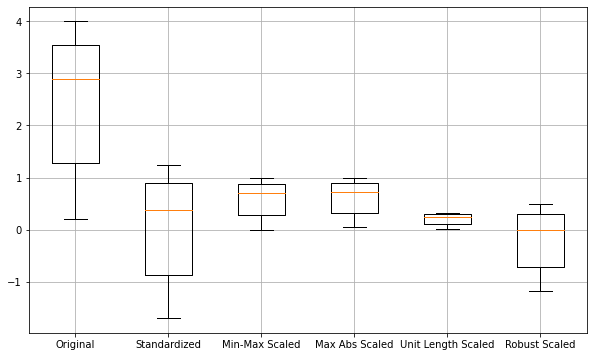

In [129]:
plt.figure(figsize=(10,6))
plt.boxplot([
    data.reshape(-1), standard_scaled_data.reshape(-1), min_max_scaled_data.reshape(-1), 
    max_abs_scaled_data.reshape(-1), unit_length_scaled_data.reshape(-1), robust_scaled_data.reshape(-1)
])
plt.xticks([1, 2, 3, 4, 5, 6], ['Original', 'Standardized', 'Min-Max Scaled', 'Max Abs Scaled', 'Unit Length Scaled', 'Robust Scaled'])
plt.grid()
plt.show()